In [1]:
import random
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

2023-12-04 13:11:40.470936: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 13:11:40.630849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 13:11:40.632062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 13:11:41.420021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# EXPLORATORY DATA ANALYSIS

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
df = pd.read_csv("Housing.csv")

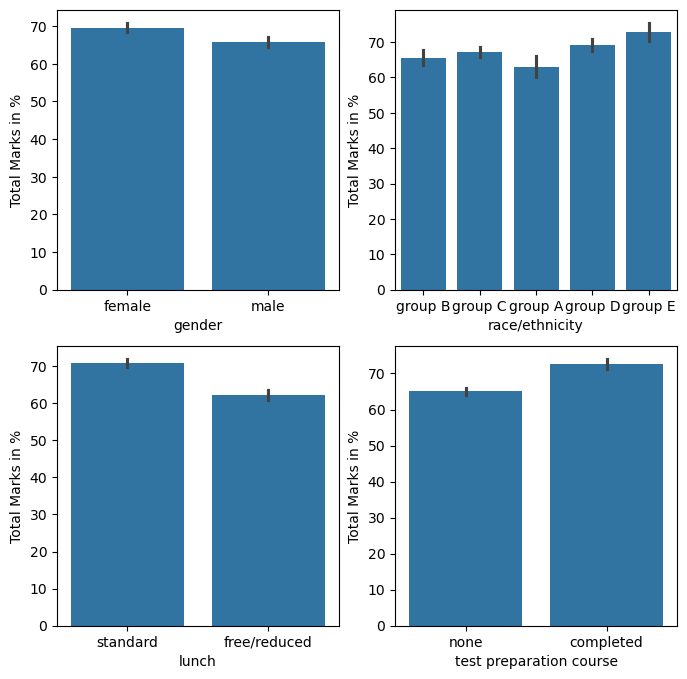

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
feat_count = 0
features = data.columns.drop(['Total Marks in %','math score','reading score','writing score','parental level of education'])
for i in range(2):
    for j in range(2):
        sns.barplot(ax=ax[i, j], data=data, x=features[feat_count], y='Total Marks in %')
        feat_count += 1

## 2:How to Construct Contingency Tables Using Python

In [3]:
data_crosstab = pd.crosstab(data['parental level of education'],  
                            data['gender'], 
                                margins = False) 
print(data_crosstab)

gender                       female  male
parental level of education              
associate's degree              116   106
bachelor's degree                63    55
high school                      94   102
master's degree                  36    23
some college                    118   108
some high school                 91    88


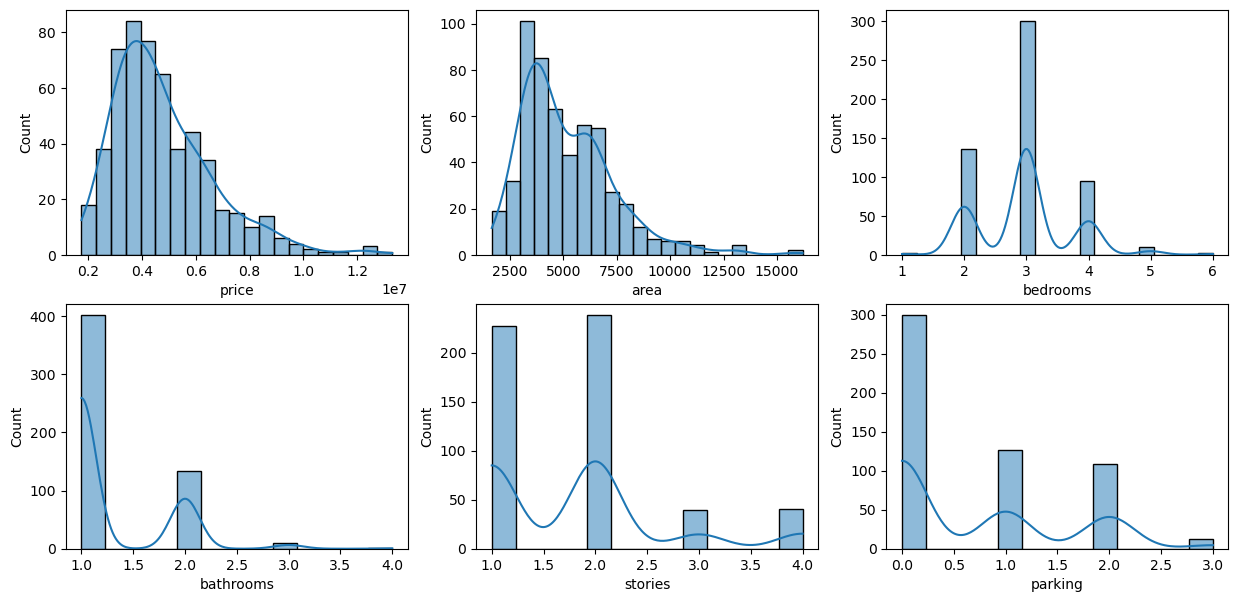

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
feat_count = 0

for i in range(2):
    for j in range(3):
        sns.histplot(ax=ax[i, j], data=df, x=features[feat_count], kde=True)
        feat_count += 1

## 4:How to Perform Binning Based on Predictive Value Using Python

In [4]:
data['Grades'] = pd.qcut(data['Total Marks in %'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['E', 'D', 'C', 'B', 'A'])
print(data.head(20))

    gender race/ethnicity parental level of education         lunch  \
0   female        group B           bachelor's degree      standard   
1   female        group C                some college      standard   
2   female        group B             master's degree      standard   
3     male        group A          associate's degree  free/reduced   
4     male        group C                some college      standard   
5   female        group B          associate's degree      standard   
6   female        group B                some college      standard   
7     male        group B                some college  free/reduced   
8     male        group D                 high school  free/reduced   
9   female        group B                 high school  free/reduced   
10    male        group C          associate's degree      standard   
11    male        group D          associate's degree      standard   
12  female        group B                 high school      standard   
13    